In [1]:
from sklearn import preprocessing
import umap.umap_ as umap
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import sklearn

from matplotlib import pyplot as plt
plt.rc('figure', max_open_warning = 0)

In [2]:
x,target=fetch_openml('shapes',return_X_y=True)
x=x.to_numpy()
y=x[:,-1]
x=x[:,:3]
x=x.astype(np.float64)
x.shape,y.shape

((16000, 3), (16000,))

In [3]:
np.unique(y).shape

(40,)

In [4]:
enc = preprocessing.OrdinalEncoder(categories='auto')

y=enc.fit_transform(y.reshape(-1,1))

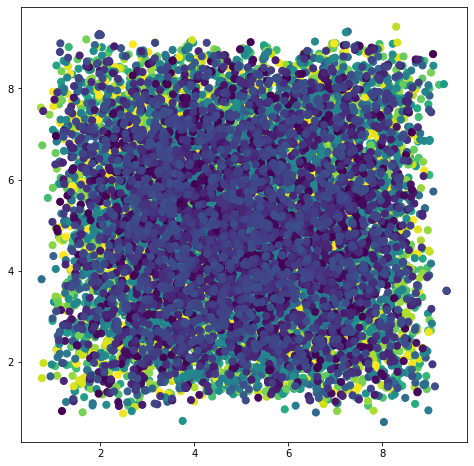

In [5]:
reducer = umap.UMAP(n_components=2,learning_rate=0.008,init='random')

x_umap=reducer.fit_transform(x)

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.scatter(x_umap[:,0], x_umap[:,1],c=y,s=50)


In [6]:
import math
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances

In [7]:
def matrice_distance(data):
    d=euclidean_distances(data,data)
    d=preprocessing.normalize(d)
    return d

def estimateur(data,d,sigma):
    f=[]
    for i in range(40):
        s=0
        for j in range(40):
            s=s+math.exp(- (d[i][j]**2)*(sigma**(-1)))
        f.append(s)
    return f

def KL(a, b):
    a = np.asarray(a, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

In [8]:
A=matrice_distance(x_umap)
B=d=matrice_distance(x)

In [9]:
sigma=[0.01,0.1,1]
f=[estimateur(x,B,sigma) for sigma in sigma]
g=[estimateur(x_umap,A,sigma) for sigma in sigma]


kl=[]
for i in range(3):
    kl.append(KL(f[i],g[i]))


RMSE=[]
MSE = np.square(np.subtract(B,A)).mean()
RMSE.append(math.sqrt(MSE))


from sklearn.manifold import trustworthiness
Trust=[]
Trust.append(sklearn.manifold.trustworthiness(B,A))

In [10]:
Tab=pd.DataFrame([kl])
Tab.columns=['KL_0.01','KL_0.1','KL_1']
Tab['RMSE']=RMSE
Tab['Trust']=Trust
Tab

,KL_0.01,KL_0.1,KL_1,RMSE,Trust
0,3.689302,0.370861,0.037106,0.004357,0.564541
